# Data Exploration

## 1. Load Pager Duty Incident Data
###   - From Jan 2017 to Sep 2019

In [24]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import datetime
%matplotlib inline

from IPython.display import display, HTML
all = pd.read_csv("../incident_prioritization/all.csv")
#for col in all.columns: 
#    print(col)
compact = all[['created_on','resolved_on','service_name','description','seconds_to_resolve','urgency']].copy()
#compact.head()

## Extract date and time from datetime column

In [25]:
#compact.dtypes
compact['created_date'] = [datetime.datetime.date(pd.to_datetime(d)) for d in compact['created_on']]
compact['created_time'] = [datetime.datetime.time(pd.to_datetime(d)) for d in compact['created_on']]
compact['created_datetime'] = [pd.to_datetime(d) for d in compact['created_on']]
#compact.head()
#dates = [pd.to_datetime(d) for d in compact['created_on']]

In [163]:
# plot data

#compact['created_date'] = [pd.to_datetime(d) for d in compact['created_date']]
#compact['created_time'] = [pd.to_datetime(d) for d in compact['created_time']]
#compact['created_datetime'] = [pd.to_datetime(d) for d in compact['created_datetime']]

## Work on subset of data

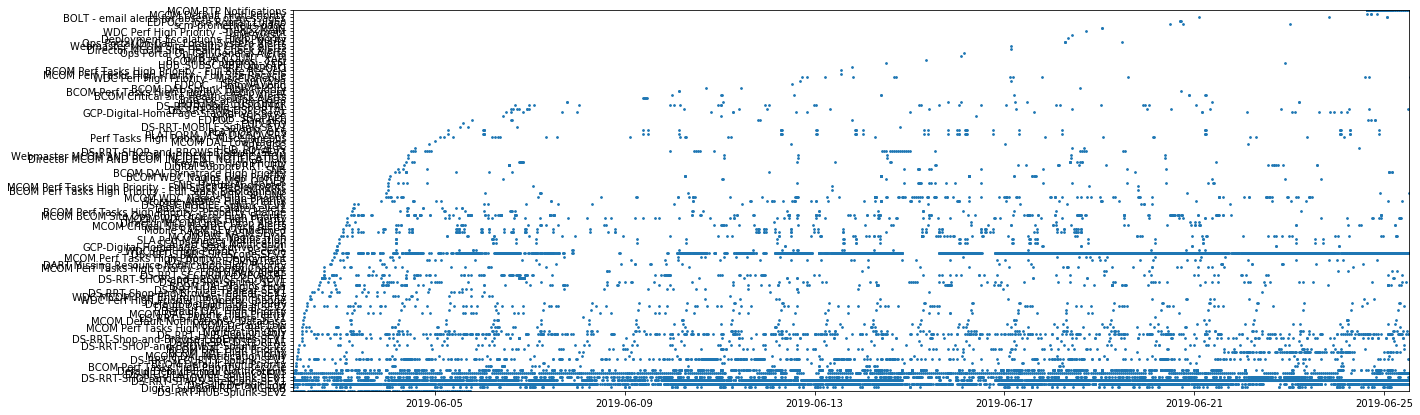

In [194]:
startdate = pd.to_datetime("2019-06-01").date()
enddate = pd.to_datetime("2019-06-25").date()
#startdate
#enddate
compact.set_index('created_date')
#compact.dtypes
mask = (compact['created_date'] > startdate) & (compact['created_date'] <= enddate)
june2019 = compact.loc[mask]
#june2019 = compact.loc(startdate:enddate)
fig, ax = plt.subplots(figsize=(20,7))
#fig, (ax1, ax2) = plt.subplots(ncols=2)
# use unstack()
grouped = june2019.groupby(['created_datetime','created_time','service_name']).count()['description'].reset_index()
#grouped = june2019.groupby(['created_datetime','service_name']).count()['description'].reset_index()
#grouped
pd.set_option('display.max_rows', 5000)
grouped
#grouped.dtypes
#groupedfiltered = grouped[grouped['description'] > 1]
#groupedfiltered.head()
#groupedfiltered.groupby(['created_date','created_time','service_name']).max()['description'].unstack().plot(ax=ax)
#grouped.plot.scatter(y='created_date',x='description')
#ax.plot(grouped['created_time'],grouped['description'])
#grouped.unstack().plot(ax=ax)
#ax.scatter(pd.to_timedelta(grouped['created_time'].astype(str)) / pd.offsets.Minute(1),grouped['created_date'])
#for i, j in grouped.iterrows(): 
#    ax.plot(grouped['description'],j['service_name'])
#ax.scatter(grouped['created_time'],grouped['service_name'])
#june2019.groupby(['created_date','created_time','service_name']).count()['description'].unstack().plot(ax=ax)
#june2019.groupby(['created_date','service_name']).count()['description'].unstack().plot(ax=ax)
#june2019.groupby(['created_date','created_time','service_name']).count()['description'].unstack().plot(ax=ax)
#ax = fig.add_axes([0,0,1,1])
#ax.bar(grouped['created_datetime'],grouped['description'],color = 'g', width = 0.25)
ax.margins(x=-0.001, y=0)
#ax.scatter(grouped['created_datetime'],grouped['service_name'],pd.to_timedelta(grouped['created_time'].astype(str)) / pd.offsets.Minute(1))
ax.scatter(grouped['created_datetime'],grouped['service_name'],3)
#groupeddata = june2019.groupby(['created_date','service_name']).count()['description']
#groupeddata.head()
#groupeddata = groupeddata['description'] > 3
#compact.plot.scatter(compact['created_date'], y=compact['service_name']);
#print(len(allid))
#urgency = allid.groupby('urgency').agg({'acknowledge_count': 'sum'})
#urgency.sort_values(by=('acknowledge_count'),ascending=False)
#service_urgency = allid.groupby(['urgency','service_name']).agg({'acknowledge_count': 'sum'})
#service_urgency.sort_values(by=('acknowledge_count'),ascending=False)

## Load sev1 issues from weekly report

In [189]:
all = pd.read_csv("../incident_prioritization/weekly_report.csv")
#for col in all.columns: 
#    print(col)
sev_compact = all[['sev1_issue_datetime','date','Channel','Brand','issue','revenue_impact']].copy()
sev_compact

,sev1_issue_datetime,date,Channel,Brand,issue,revenue_impact
0,2019-05-31T12:00:00-00:00,5/31/19,NaN,NaN,While adding any credit card into wallet from ...,no
1,2019-06-02T12:00:00-00:00,6/2/19,NaN,NaN,Macy’s.com traffic going to GCP (1%) experienc...,yes
2,2019-06-04T12:00:00-00:00,6/4/19,Macys.com International Customers were receivi...,NaN,Macys.com International Customers were receivi...,yes
3,2019-06-04T12:00:00-00:00,6/4/19,NaN,NaN,Excessive discounts being taken with Promo Cod...,yes
4,2019-06-05T12:00:00-00:00,6/5/19,NaN,NaN,Some PayPal transactions experienced longer co...,yes
5,2019-06-05T12:00:00-00:00,6/5/19,NaN,NaN,Sensitive Data exposed in the MyAccount URLs a...,no
6,2019-06-06T12:00:00-00:00,6/6/19,NaN,NaN,Customers not getting free shipping promotion...,yes
7,2019-06-06T12:00:00-00:00,6/6/19,NaN,NaN,"MCOM Traffic reduction, latency and Order drop",yes
8,2019-06-14T12:00:00-00:00,6/14/19,NaN,NaN,BCOM Orders to Batch,yes
9,2019-06-14T12:00:00-00:00,6/14/19,NaN,NaN,MCOM WDC Issues Impacting Code Release,no


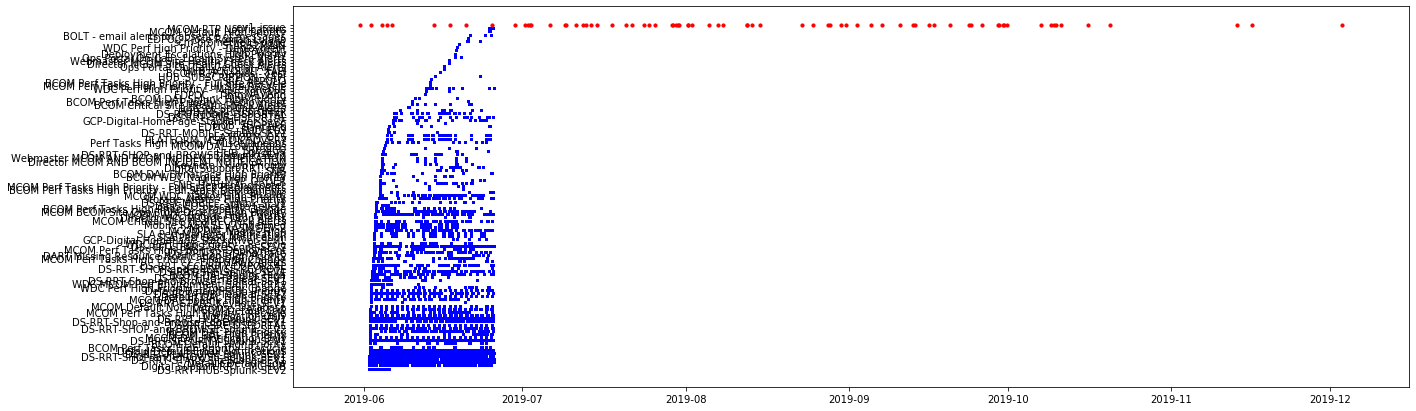

In [221]:
sev_compact['created_date'] = [datetime.datetime.date(pd.to_datetime(d)) for d in sev_compact['sev1_issue_datetime']]
sev_compact['created_time'] = [datetime.datetime.time(pd.to_datetime(d)) for d in sev_compact['sev1_issue_datetime']]
sev_compact['created_datetime'] = [pd.to_datetime(d) for d in sev_compact['sev1_issue_datetime']]
sev_compact['service_name'] = ['sev1_issue' for d in sev_compact['sev1_issue_datetime']]
sev_compact['description'] = [sev_compact['issue'] for d in sev_compact['issue']]
sev_grouped = sev_compact.groupby(['created_datetime','created_time','service_name']).count()['description'].reset_index()
#sev_grouped
#grouped
sev_plus_grouped = grouped.append(sev_grouped)
sev_plus_grouped
fig1, ax1 = plt.subplots(figsize=(20,7))
ax1.scatter(sev_plus_grouped['created_datetime'],sev_plus_grouped['service_name'],3)

servicenamelist = sev_plus_grouped.service_name.unique()
servicenamelist
for servicename in servicenamelist:
    if servicename == 'sev1_issue':
        color = 'red'
        scale = 10
        ax1.scatter(sev_grouped['created_datetime'],sev_grouped['service_name'],c=color,s=scale)
    else:
        color = 'blue'
        scale = 3
        ax1.scatter(grouped['created_datetime'],grouped['service_name'],c=color,s=scale)
    #ax1.scatter(grouped['created_datetime'],servicename,c=color,s=scale)
#    n = 750
#    x, y = np.random.rand(2, n)
#    scale = 200.0 * np.random.rand(n)
    
#(x, y, c=color, s=scale, label=color,
#               alpha=0.3, edgecolors='none')

#ax.legend()
#ax.grid(True)

In [119]:
#for col in compact.columns: 
#    print(col)
#startdate = pd.to_datetime("2019-06-01").date()
#enddate = pd.to_datetime("2019-06-25").date()
#compact.reindex(['created_date'])
#filtered = compact.loc[startdate:enddate]
#filtered.head()
june2019['created_time_int'] = [pd.to_timedelta(june2019['created_time'].astype(str)) / pd.offsets.Minute(1) for d in june2019['created_time']]
june2019.head()                                
#tab = pd.crosstab(june2019['created_datetime'],june2019['service_name']).stack().reset_index(name='index')
#tab.head()
#tab.plot.scatter('created_datetime', 'service_name')
#tab[:-1]
#for col in filtered.columns: 
#    print(col)
#tab.plot.scatter(tab[0],tab[1])
#len(tab.index)
#len(tab.columns)
#fig, ax = plt.subplots()
#ax.scatter(pd.to_timedelta(june2019['created_time'].astype(str)) / pd.offsets.Minute(1),june2019['created_date'])

/Users/a071887/pdip/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,created_on,resolved_on,service_name,description,seconds_to_resolve,urgency,created_date,created_time,created_datetime,created_time_int
378620,2019-06-02T00:00:34-04:00,2019-06-02T10:19:52-04:00,DS-RRT-HUB-Splunk-SEV2,Splunk Alert: SEV2:MCOM:WDC:PREFERENCES_XAPI:H...,37158.0,high,2019-06-02,00:00:34,2019-06-02 00:00:34-04:00,378620 0.566667 378621 0.783333 37...
378621,2019-06-02T00:00:47-04:00,2019-06-02T02:23:26-04:00,Digital Support RRT - MCHUB,Splunk Alert: D2C Confirm Order ESEND response...,8559.0,high,2019-06-02,00:00:47,2019-06-02 00:00:47-04:00,378620 0.566667 378621 0.783333 37...
378622,2019-06-02T00:01:03-04:00,2019-06-02T00:11:03-04:00,Default Default Low,PB API Products Maintenance - Cross-Border Ret...,600.0,low,2019-06-02,00:01:03,2019-06-02 00:01:03-04:00,378620 0.566667 378621 0.783333 37...
378623,2019-06-02T00:01:06-04:00,2019-06-02T00:11:06-04:00,Default Default Low,Pitney Bowes Spectrum Technology Platform Expi...,600.0,low,2019-06-02,00:01:06,2019-06-02 00:01:06-04:00,378620 0.566667 378621 0.783333 37...
378624,2019-06-02T00:01:17-04:00,2019-06-02T02:23:26-04:00,Digital Support RRT - MCHUB,Splunk Alert: D2C Confirm Order performance fo...,8529.0,high,2019-06-02,00:01:17,2019-06-02 00:01:17-04:00,378620 0.566667 378621 0.783333 37...


In [ ]:
allid = pd.read_csv("../incident_prioritization/all.csv")
selected = allid[['description','service_name','escalation_policy_name','urgency','acknowledge_count']]
selected.to_csv("/Users/a071887/Documents/incident_prioritization/selected.csv")

In [ ]:
selected = pd.read_csv("../incident_prioritization/selected.csv")
service_name = selected.groupby('service_name').agg({'description': 'count'})
service_name.sort_values(by=('description'),ascending=False)
description = selected.groupby('description').agg({'service_name': 'count'})
description.sort_values(by=('service_name'),ascending=False)



In [ ]:
import datetime

data = pd.read_csv("../incident_prioritization/all.csv")
data['date'] = [datetime.datetime.date(pd.to_datetime(d)) for d in data['created_on']]
data.set_index('date', inplace=True)

In [ ]:
import pandas as pd
import os
#print(data.head(100))
startdate = pd.to_datetime("2019-06-24").date()
enddate = pd.to_datetime("2019-06-25").date()
filtered = data.loc[startdate:enddate]
pd.set_option('display.max_rows', 5000)
description = filtered.groupby(['date','service_name','description']).agg({'id': 'count'})
description.sort_values(by=(['date','id']),ascending=True)


